# credit crisis modeling on lending club
信用风险建模：PD, LGD, EAD

## 加载数据

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# 查看目录下的文件，查询数据文件名
!ls ..

code_backup				      LCDataDictionary.xlsx
code_my					      loan.csv
datasets_680898_1195636_Data_Dictionary.xlsx  loan_data_2007_2014.csv


In [3]:
# 加载数据文件
df_bk = pd.read_csv('../loan_data_2007_2014.csv')
# 查看数据的各列基本情况
df_bk.info()

/home/ligy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# 每列的意义
# 从以下稍有不同的数据集描述中筛选出本数据集的描述
pd.set_option('max_colwidth', 400) # 全部显示，不省略显示字符串
col_name = pd.read_excel('../datasets_680898_1195636_Data_Dictionary.xlsx')
cols = df_bk.columns
col_names = pd.DataFrame(columns=['LoanStatNew', 'Description'])
for i, col in enumerate(cols):
    if col in list(col_name.LoanStatNew):
        col_names.loc[i, 'Description'] = col_name[col_name.LoanStatNew == col]['Description'].values[0]
        col_names.loc[i, 'LoanStatNew'] = col_name[col_name.LoanStatNew == col]['LoanStatNew'].values[0]
col_names

,LoanStatNew,Description
1,id,A unique LC assigned ID for the loan listing.
2,member_id,A unique LC assigned Id for the borrower member.
3,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
4,funded_amnt,The total amount committed to that loan at that point in time.
5,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
...,...,...
69,max_bal_bc,Maximum current balance owed on all revolving accounts
70,all_util,Balance to credit limit on all trades
72,inq_fi,Number of personal finance inquiries
73,total_cu_tl,Number of finance trades


In [5]:
# 数据头
pd.options.display.max_columns = None # 显示全部列，不压缩显示
pd.set_option('max_colwidth', 20)
df_bk.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lend...,Borrower added...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lend...,NaN,small_business,real estate busi...,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medic...,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lend...,Borrower added...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_bk.iloc[:, 3:]
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lend...,Borrower added...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lend...,NaN,small_business,real estate busi...,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lend...,Borrower added...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medic...,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lend...,Borrower added...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 预处理数据

- 总体分析

In [7]:
cols = [x for x in list(df.columns) if int(df[x].count()) is 0] # 找到空列的名称，存到list中
df.drop(labels=cols, inplace=True, axis=1) # 丢弃空列
df.shape # 检查结果

(466285, 55)

- 生成数据集的描述性报告

In [8]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file('df_report.html')

ModuleNotFoundError: No module named 'pandas_profiling'

![overiew](images/df_overiew.png)

In [9]:
drop_cols = ['application_type', 'funded_amnt', 'funded_amnt_inv', 'installment', 
             'out_prncp_inv', 'policy_code', 'total_pymnt_inv', 'total_rec_prncp']
df.drop(labels=drop_cols, inplace=True, axis=1) # 丢弃高度相关的变量，和常数变量
df.shape

(466285, 47)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   grade                        466285 non-null  object 
 4   sub_grade                    466285 non-null  object 
 5   emp_title                    438697 non-null  object 
 6   emp_length                   445277 non-null  object 
 7   home_ownership               466285 non-null  object 
 8   annual_inc                   466281 non-null  float64
 9   verification_status          466285 non-null  object 
 10  issue_d                      466285 non-null  object 
 11  loan_status                  466285 non-null  object 
 12  pymnt_plan                   466285 non-null  object 
 13 

In [40]:
# 变量loan_amnt
df.loan_amnt.isna().sum()

0

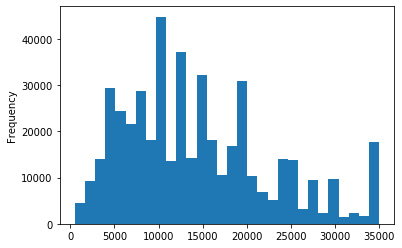

In [13]:
df.loan_amnt.plot(kind='hist', bins=30);

In [16]:
# 变量term
df.term.unique() # 多少个值

array([' 36 months', ' 60 months'], dtype=object)

In [41]:
df.term.isna().sum() # 空值个数

0

In [24]:
df['term'] = df.term.str.replace(' 36 months', str(36)) # 以月为单位
df['term'] = df.term.str.replace(' 60 months', str(60))

In [32]:
df.term = pd.to_numeric(df.term)

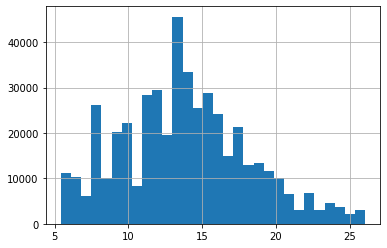

In [39]:
# 变量int_rate
df.int_rate.hist(bins=30);

In [42]:
df.int_rate.isna().sum() # 空值个数

0

In [45]:
# 变量grade
df.grade.value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

In [47]:
# 变量emp_length
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [61]:
df.emp_length = df.emp_length.str.replace('10\+ years', str(10))
df.emp_length = df.emp_length.str.replace('< 1 year', str(0))
df.emp_length = df.emp_length.str.replace('nan', str(0))
df.emp_length = df.emp_length.str.replace(' years', '')
df.emp_length = df.emp_length.str.replace(' year', '')

In [62]:
df.emp_length.unique() # 检查结果

array(['10+', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)